In [4]:
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np
import matplotlib.pyplot as plt

In [8]:
titanic = pd.read_csv("train.csv")

In [16]:
titanic.shape

(891, 12)

In [20]:
#Analisando os dados brutos
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#Trocando os nomes
titanic.columns=["Id_passageiro","Sobreviveu","Classe","Nome","Genero","Idade","SibSp","Parch","Ticket","Tarifa","Cabine","Embarcou"]

In [26]:
#Visualizando com os nomes trocados
titanic.head()

,Id_passageiro,Sobreviveu,Classe,Nome,Genero,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#Descobrindo a quantidade de dados nulos
titanic.isnull().sum()

Id_passageiro      0
Sobreviveu         0
Classe             0
Nome               0
Genero             0
Idade            177
SibSp              0
Parch              0
Ticket             0
Tarifa             0
Cabine           687
Embarcou           2
dtype: int64

In [40]:
titanic['Embarcou'].isnull().sum()

2

In [43]:
# Mostrando quais são os dados nulos de embarcou
titanic[titanic.Embarcou.isnull()]

,Id_passageiro,Sobreviveu,Classe,Nome,Genero,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarcou
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [55]:
# Foi pesquisado que os dois passageiros emnarcaram, então substitui os nulos por S
titanic['Embarcou'] = titanic['Embarcou'].fillna('S')

In [51]:
titanic[titanic.Embarcou.isnull()]

,Id_passageiro,Sobreviveu,Classe,Nome,Genero,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarcou


In [53]:
titanic.isnull().sum()

Id_passageiro      0
Sobreviveu         0
Classe             0
Nome               0
Genero             0
Idade            177
SibSp              0
Parch              0
Ticket             0
Tarifa             0
Cabine           687
Embarcou           0
dtype: int64

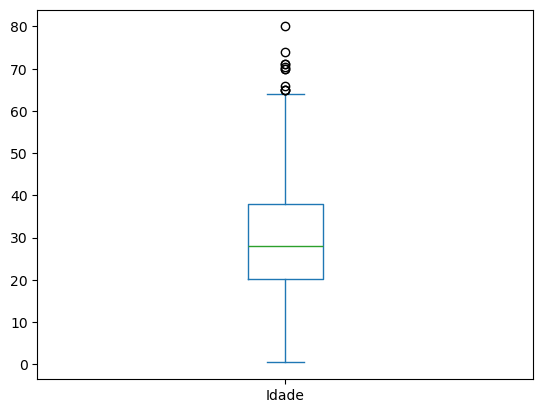

In [63]:
#Analisando a idade a partir de gráficos
titanic.Idade.plot.box();

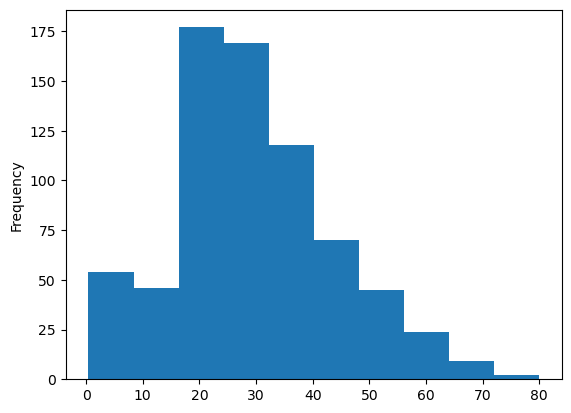

In [69]:
titanic.Idade.plot.hist();

In [75]:
# Tirando a mediana das idades agrupado por classe e gênero
titanic.groupby(['Classe', 'Genero'])['Idade'].median()

Classe  Genero
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Idade, dtype: float64

In [81]:
# Transformando idades nulas na mediana, sem afetar as idades ja existentes
titanic['Idade'] = titanic.Idade.fillna(titanic.groupby(['Classe', 'Genero'])['Idade'].transform('median'))

In [91]:
# Verificando
titanic[titanic.Idade.isnull()]

,Id_passageiro,Sobreviveu,Classe,Nome,Genero,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarcou,idade


In [89]:
titanic.isnull().sum()

Id_passageiro      0
Sobreviveu         0
Classe             0
Nome               0
Genero             0
Idade              0
SibSp              0
Parch              0
Ticket             0
Tarifa             0
Cabine           687
Embarcou           0
idade              0
dtype: int64

In [95]:
# Trocando o 0 e 1 por não e sim, para os dados ficarem mais intuitivos de serem visualizados
titanic.loc[titanic['Sobreviveu'] == 0, 'Sobreviveu'] = 'Não'
titanic.loc[titanic['Sobreviveu'] == 1, 'Sobreviveu'] = 'Sim'

In [103]:
titanic['Sobreviveu']

0      Não
1      Sim
2      Sim
3      Sim
4      Não
      ... 
886    Não
887    Sim
888    Não
889    Sim
890    Não
Name: Sobreviveu, Length: 891, dtype: object

In [105]:
titanic['Sobreviveu'].value_counts()

Sobreviveu
Não    549
Sim    342
Name: count, dtype: int64

In [120]:
# Observando que Ticket tem muitos valores diferentes
titanic['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [122]:
titanic.describe()

,Id_passageiro,Classe,Idade,SibSp,Parch,Tarifa,idade
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.112424,0.523008,0.381594,32.204208,29.112424
std,257.353842,0.836071,13.304424,1.102743,0.806057,49.693429,13.304424
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,2.000000,21.500000,0.000000,0.000000,7.910400,21.500000
50%,446.000000,3.000000,26.000000,0.000000,0.000000,14.454200,26.000000
75%,668.500000,3.000000,36.000000,1.000000,0.000000,31.000000,36.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [124]:
# Observando que tem tarifas muito altas em relação a média, mas nada fora do nomal
titanic[titanic.Tarifa == titanic.Tarifa.max()]

,Id_passageiro,Sobreviveu,Classe,Nome,Genero,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarcou,idade
258,259,Sim,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,35.0
679,680,Sim,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,36.0
737,738,Sim,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,35.0


In [136]:
# Observando dados sem muita relevância
titanic.nunique()

Id_passageiro    891
Sobreviveu         2
Classe             3
Nome             891
Genero             2
Idade             89
SibSp              7
Parch              7
Ticket           681
Tarifa           248
Cabine           147
Embarcou           3
dtype: int64

In [138]:
# Excluindo tabelas sem relevância
titanic = titanic.drop(['Id_passageiro', 'Ticket'],axis=1)

In [140]:
# Exibindo os dados limpos e tratados
titanic.head()

,Sobreviveu,Classe,Nome,Genero,Idade,SibSp,Parch,Tarifa,Cabine,Embarcou
0,Não,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,Sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,Não,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [142]:
titanic.info

<bound method DataFrame.info of     Sobreviveu  Classe                                               Nome  \
0          Não       3                            Braund, Mr. Owen Harris   
1          Sim       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2          Sim       3                             Heikkinen, Miss. Laina   
3          Sim       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4          Não       3                           Allen, Mr. William Henry   
..         ...     ...                                                ...   
886        Não       2                              Montvila, Rev. Juozas   
887        Sim       1                       Graham, Miss. Margaret Edith   
888        Não       3           Johnston, Miss. Catherine Helen "Carrie"   
889        Sim       1                              Behr, Mr. Karl Howell   
890        Não       3                                Dooley, Mr. Patrick   

     Genero  Idade  SibSp  Parch   Tarifa C